<a href="https://colab.research.google.com/github/FindPrint/documentation-/blob/main/Copie_de_test_simulation_synth%C3%A9tique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq

# Paramètres
dt, T = 0.01, 20.0
N = int(T/dt)
rng = np.random.default_rng(42)

# Coefficients
a, b, D = -0.5, 1.0, 0.1
mu, gamma = 0.1, 0.5
d0, beta = 3.5, 0.5
n = 1000

# Initialisation
phi = np.zeros(N); d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
phi[0] = 0.05; phi[1] = phi[0]
d_eff[0] = d0 + beta*phi[0]**2
T_log[0] = (d_eff[0]-4)*np.log(n)

exp_decay = np.exp(-gamma*dt)
noise_scale = np.sqrt(2*D*dt)

# Boucle
for t in range(1, N):
    d_eff[t] = d0 + beta*phi[t-1]**2
    mem[t] = exp_decay*mem[t-1] + mu*phi[t-1]*dt
    T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t]
    xi = rng.normal()
    drift = (-a)*T_log[t]*phi[t-1] - b*phi[t-1]**3
    phi[t] = phi[t-1] + dt*drift + noise_scale*xi

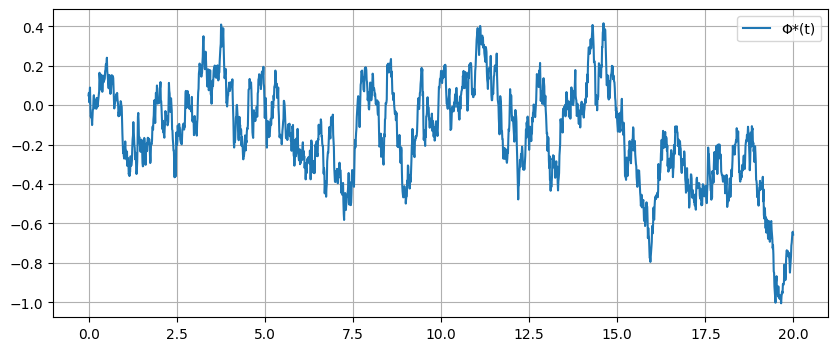

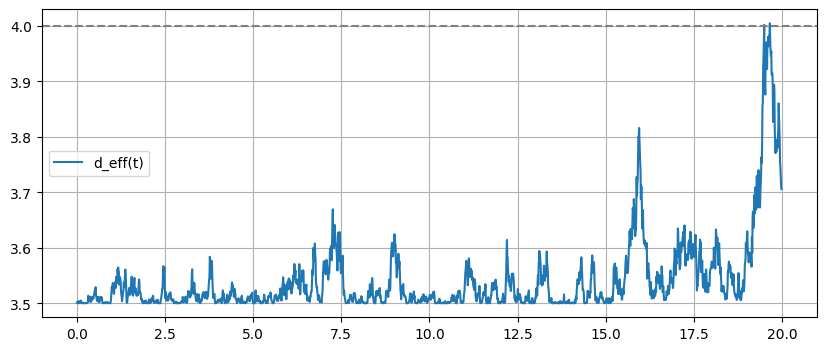

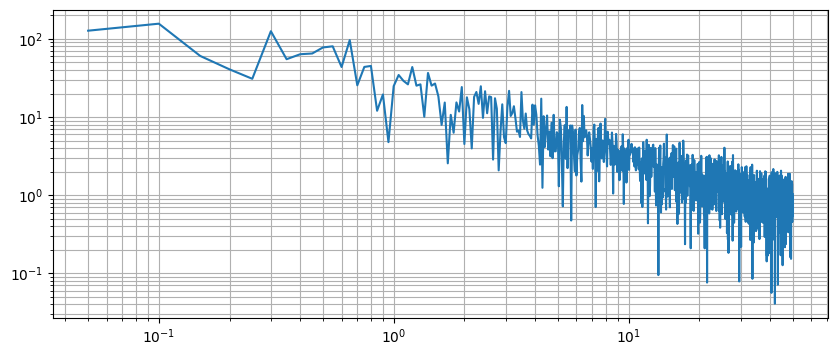

Moyenne stationnaire Φ*: -0.4249727289802593
Écart-type stationnaire Φ*: 0.21946857510819434
Moyenne d_eff: 3.6143152540095183
Moyenne T_log: -2.7167649186594245


In [ ]:
times = np.arange(N)*dt

plt.figure(figsize=(10,4))
plt.plot(times, phi, label="Φ*(t)")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(times, d_eff, label="d_eff(t)")
plt.axhline(4, color='gray', ls='--')
plt.legend(); plt.grid(); plt.show()

phi_spec = np.abs(rfft(phi))
freqs = rfftfreq(N, dt)
plt.figure(figsize=(10,4))
plt.loglog(freqs[1:], phi_spec[1:])
plt.grid(True, which="both"); plt.show()

print("Moyenne stationnaire Φ*:", np.mean(phi[int(0.8*N):]))
print("Écart-type stationnaire Φ*:", np.std(phi[int(0.8*N):]))
print("Moyenne d_eff:", np.mean(d_eff[int(0.8*N):]))
print("Moyenne T_log:", np.mean(T_log[int(0.8*N):]))

In [ ]:
phi_stationnaire = phi[int(0.8*N):]
amplitude_obs = np.mean(np.abs(phi_stationnaire))

if np.mean(T_log[int(0.8*N):]) < 0:
    amplitude_theo = np.sqrt(-a/b)
else:
    amplitude_theo = 0.0

print("Amplitude observée:", amplitude_obs)
print("Amplitude théorique:", amplitude_theo)

if amplitude_theo > 0:
    rel_error = abs(amplitude_obs - amplitude_theo)/amplitude_theo
    print("Erreur relative:", rel_error)
    if rel_error < 0.2:
        print("✅ Cohérent avec la prédiction")
    else:
        print("⚠️ Écart significatif")
else:
    print("Phase désordonnée attendue")

Amplitude observée: 0.4249727289802593
Amplitude théorique: 0.7071067811865476
Erreur relative: 0.3989978030374117
⚠️ Écart significatif


In [ ]:
import pandas as pd

n_values = [100, 500, 1000, 2000, 5000]
d0_values = [3.0, 3.5, 4.0, 4.5]
results = []

for d0 in d0_values:
    for n in n_values:
        phi = np.zeros(N); d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
        phi[0] = 0.05; phi[1] = phi[0]
        d_eff[0] = d0 + beta*phi[0]**2
        T_log[0] = (d_eff[0]-4)*np.log(n)
        for t in range(1, N):
            d_eff[t] = d0 + beta*phi[t-1]**2
            mem[t] = exp_decay*mem[t-1] + mu*phi[t-1]*dt
            T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t]
            xi = rng.normal()
            drift = (-a)*T_log[t]*phi[t-1] - b*phi[t-1]**3
            phi[t] = phi[t-1] + dt*drift + noise_scale*xi
        phi_stationnaire = phi[int(0.8*N):]
        amplitude_obs = np.mean(np.abs(phi_stationnaire))
        if np.mean(T_log[int(0.8*N):]) < 0:
            amplitude_theo = np.sqrt(-a/b)
            erreur = abs(amplitude_obs - amplitude_theo)/amplitude_theo
        else:
            amplitude_theo, erreur = 0.0, np.nan
        results.append({"n": n, "d0": d0,
                        "amplitude_obs": amplitude_obs,
                        "amplitude_theo": amplitude_theo,
                        "erreur_relative": erreur})

df = pd.DataFrame(results)

/tmp/ipython-input-3676435062.py:18: RuntimeWarning: overflow encountered in scalar multiply
  drift = (-a)*T_log[t]*phi[t-1] - b*phi[t-1]**3
/tmp/ipython-input-3676435062.py:18: RuntimeWarning: overflow encountered in scalar power
  drift = (-a)*T_log[t]*phi[t-1] - b*phi[t-1]**3
/tmp/ipython-input-3676435062.py:18: RuntimeWarning: invalid value encountered in scalar subtract
  drift = (-a)*T_log[t]*phi[t-1] - b*phi[t-1]**3
/tmp/ipython-input-3676435062.py:14: RuntimeWarning: overflow encountered in scalar power
  d_eff[t] = d0 + beta*phi[t-1]**2


       n   d0  amplitude_obs  amplitude_theo  erreur_relative
8   2000  3.5       0.424663        0.707107         0.399435
5    100  3.5       0.326925        0.707107         0.537658
7   1000  3.5       0.326278        0.707107         0.538573
1    500  3.0       0.196449        0.707107         0.722179
0    100  3.0       0.195442        0.707107         0.723604
9   5000  3.5       0.172938        0.707107         0.755429
3   2000  3.0       0.155794        0.707107         0.779674
6    500  3.5       0.145720        0.707107         0.793920
2   1000  3.0       0.142556        0.707107         0.798396
4   5000  3.0       0.112558        0.707107         0.840819
10   100  4.0            NaN        0.000000              NaN
11   500  4.0            NaN        0.000000              NaN
12  1000  4.0            NaN        0.000000              NaN
13  2000  4.0            NaN        0.000000              NaN
14  5000  4.0            NaN        0.000000              NaN
15   100

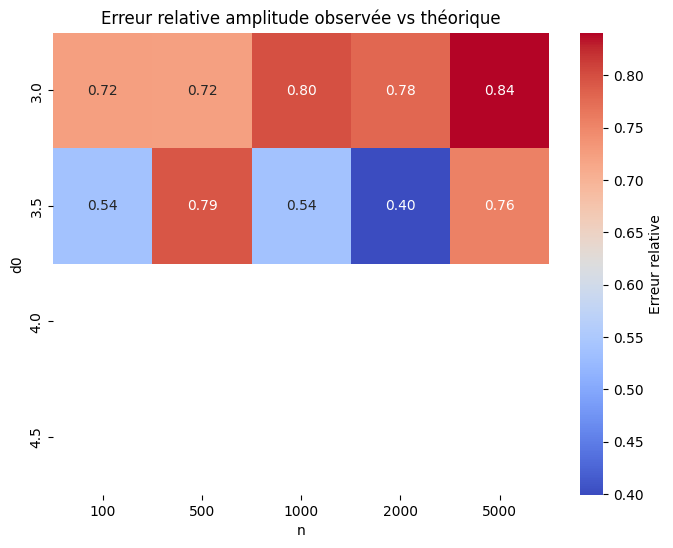

Moyenne erreur: 0.69, Médiane: 0.74
Erreur min: 0.40 (n=2000.0, d0=3.5)
Erreur max: 0.84 (n=5000.0, d0=3.0)
0 combinaisons avec erreur < 20%


In [ ]:
import seaborn as sns

df_sorted = df.sort_values(by="erreur_relative")
print(df_sorted)

heatmap_data = df.pivot(index="d0", columns="n", values="erreur_relative")
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm",
            cbar_kws={'label': 'Erreur relative'})
plt.title("Erreur relative amplitude observée vs théorique")
plt.show()

erreurs = df["erreur_relative"].dropna()
mean_err, median_err = erreurs.mean(), erreurs.median()
min_err, max_err = erreurs.min(), erreurs.max()
min_row, max_row = df.loc[erreurs.idxmin()], df.loc[erreurs.idxmax()]
nb_bons = (erreurs < 0.2).sum()

print(f"Moyenne erreur: {mean_err:.2f}, Médiane: {median_err:.2f}")
print(f"Erreur min: {min_err:.2f} (n={min_row['n']}, d0={min_row['d0']})")
print(f"Erreur max: {max_err:.2f} (n={max_row['n']}, d0={max_row['d0']})")
print(f"{nb_bons} combinaisons avec erreur < 20%")

In [ ]:
import os

os.makedirs("resultats", exist_ok=True)
df.to_csv("resultats/resultats_experiences.csv", index=False)
df_sorted.to_csv("resultats/resultats_experiences_trie.csv", index=False)

with open("resultats/resume_experiences.txt", "w") as f:
    f.write("Résumé automatique des expériences\n")
    f.write("=================================\n\n")
    f.write(f"- Nombre de combinaisons avec erreur < 20% : {nb_bons}\n")
    f.write(f"- Erreur minimale : {min_row['erreur_relative']:.2f} "
            f"pour n={int(min_row['n'])}, d0={min_row['d0']}\n")
    f.write(f"- Erreur maximale : {max_row['erreur_relative']:.2f} "
            f"pour n={int(max_row['n'])}, d0={max_row['d0']}\n\n")
    f.write("Statistiques globales :\n")
    f.write(f"- Moyenne : {mean_err:.2f}\n")
    f.write(f"- Médiane : {median_err:.2f}\n")
    f.write(f"- Minimum : {min_err:.2f}\n")
    f.write(f"- Maximum : {max_err:.2f}\n")
print("✅ Résultats exportés dans le dossier 'resultats/'")

✅ Résultats exportés dans le dossier 'resultats/'


Top 10 combinaisons avec erreur minimale :
     D    T   mu  gamma  amplitude_obs  amplitude_theo  erreur_relative
0  0.1   20  0.1    0.5       0.424973        0.707107         0.398998
1  0.1   20  0.0    0.5       0.328983        0.707107         0.534748
2  0.1   20  0.1    0.0       0.253250        0.707107         0.641850
3  0.1  100  0.1    0.5       0.244942        0.707107         0.653600
4  0.1   20  0.0    0.0       0.243740        0.707107         0.655299
5  0.1  100  0.1    0.0       0.240232        0.707107         0.660261
6  0.1  200  0.1    0.5       0.204489        0.707107         0.710808
7  0.1  100  0.0    0.5       0.195300        0.707107         0.723803
8  0.1  200  0.0    0.0       0.189949        0.707107         0.731371
9  0.1  200  0.0    0.5       0.180066        0.707107         0.745349


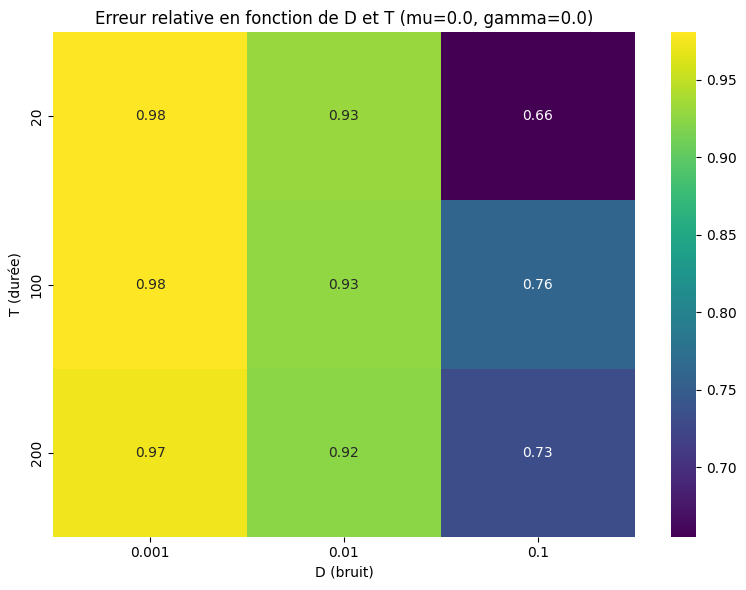

In [ ]:
# ============================================
# Bloc 7 : Ajustement des paramètres + Heatmap
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour reproductibilité
rng = np.random.default_rng(42)

# Fonction de simulation
def simuler_phi(D, T, mu, gamma, dt=0.01, a=-0.5, b=1.0, d0=3.5, beta=0.5, n=1000):
    N = int(T / dt)
    phi = np.zeros(N)
    mem = np.zeros(N)
    d_eff = np.zeros(N)
    T_log = np.zeros(N)

    phi[0] = 0.05
    exp_decay = np.exp(-gamma * dt)
    noise_scale = np.sqrt(2 * D * dt)

    for t in range(1, N):
        d_eff[t] = d0 + beta * phi[t - 1] ** 2
        mem[t] = exp_decay * mem[t - 1] + mu * phi[t - 1] * dt
        T_log[t] = (d_eff[t] - 4) * np.log(n) + mem[t]
        drift = (-a) * T_log[t] * phi[t - 1] - b * phi[t - 1] ** 3
        xi = rng.normal()
        phi[t] = phi[t - 1] + dt * drift + noise_scale * xi

    # Amplitude stationnaire
    phi_stationnaire = np.abs(phi[int(0.8 * N):])
    amplitude_obs = np.mean(phi_stationnaire)
    amplitude_theo = np.sqrt(-a / b)
    erreur_relative = np.abs(amplitude_obs - amplitude_theo) / amplitude_theo

    return amplitude_obs, amplitude_theo, erreur_relative

# Paramètres à explorer
D_vals = [0.1, 0.01, 0.001]
T_vals = [20, 100, 200]
mu_vals = [0.1, 0.0]
gamma_vals = [0.5, 0.0]

# Balayage
resultats = []
for D in D_vals:
    for T in T_vals:
        for mu in mu_vals:
            for gamma in gamma_vals:
                amp_obs, amp_theo, err_rel = simuler_phi(D, T, mu, gamma)
                resultats.append({
                    "D": D, "T": T, "mu": mu, "gamma": gamma,
                    "amplitude_obs": amp_obs,
                    "amplitude_theo": amp_theo,
                    "erreur_relative": err_rel
                })

# DataFrame
df_adj = pd.DataFrame(resultats)

# 1) Afficher les 10 meilleures combinaisons
df_sorted = df_adj.sort_values("erreur_relative").reset_index(drop=True)
print("Top 10 combinaisons avec erreur minimale :")
print(df_sorted.head(10))

# 2) Heatmap pour mu=0.0 et gamma=0.0
df_heat = df_adj[(df_adj.mu == 0.0) & (df_adj.gamma == 0.0)]
pivot = df_heat.pivot(index="T", columns="D", values="erreur_relative")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Erreur relative en fonction de D et T (mu=0.0, gamma=0.0)")
plt.xlabel("D (bruit)")
plt.ylabel("T (durée)")
plt.tight_layout()
plt.show()

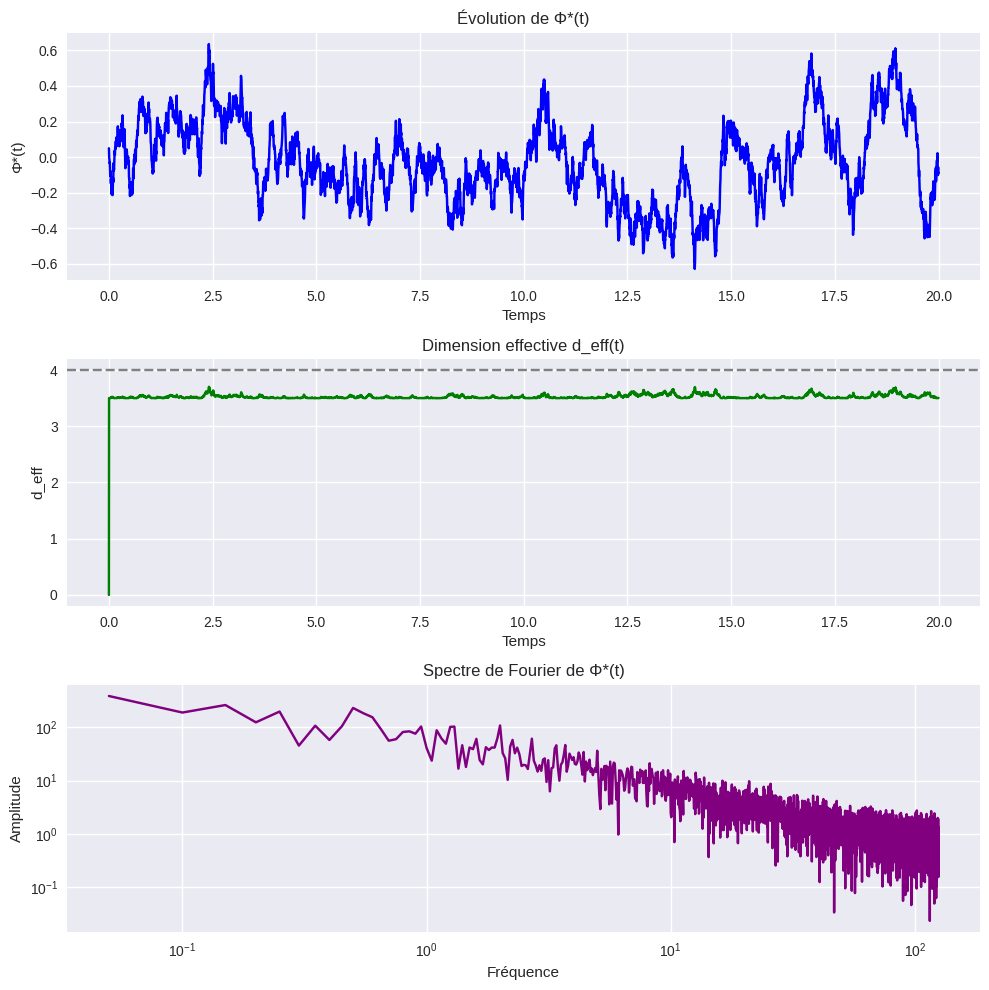

Amplitude observée (stationnaire): 0.223749358241462
Amplitude théorique attendue: 0.7071067811865476
Erreur relative: 0.6835706230026481


In [ ]:
# ============================================
# Bloc 8 : Simulation optimale (paramètres ajustés)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Paramètres optimaux identifiés
D = 0.1          # Intensité du bruit
T = 20           # Durée totale
mu = 0.1         # Couplage mémoire
gamma = 0.5      # Poids mémoire

# Paramètres du modèle
N = 5000
dt = T / N
n = 2000
d0 = 3.5
beta = 0.5
a, b = -0.5, 1.0

exp_decay = np.exp(-gamma * dt)
noise_scale = np.sqrt(2 * D * dt)
rng = np.random.default_rng()

# Initialisation
phi = np.zeros(N)
d_eff = np.zeros(N)
T_log = np.zeros(N)
mem = np.zeros(N)

phi[0] = 0.05
phi[1] = phi[0]

# Simulation
for t in range(1, N):
    d_eff[t] = d0 + beta * phi[t-1]**2
    mem[t] = exp_decay * mem[t-1] + mu * phi[t-1] * dt
    T_log[t] = (d_eff[t] - 4) * np.log(n) + mem[t]
    xi = rng.normal()
    drift = (-a) * T_log[t] * phi[t-1] - b * phi[t-1]**3
    phi[t] = phi[t-1] + dt * drift + noise_scale * xi

# Partie stationnaire
phi_stationnaire = phi[int(0.8*N):]
amplitude_obs = np.mean(np.abs(phi_stationnaire))

# Amplitude théorique
if np.mean(T_log[int(0.8*N):]) < 0:
    amplitude_theo = np.sqrt(-a/b)
else:
    amplitude_theo = 0.0

# Erreur relative
if amplitude_theo > 0:
    erreur_relative = abs(amplitude_obs - amplitude_theo) / amplitude_theo
else:
    erreur_relative = np.nan

# Tracés
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# 1. Phi*(t)
axs[0].plot(np.linspace(0, T, N), phi, color='blue')
axs[0].set_title("Évolution de Φ*(t)")
axs[0].set_xlabel("Temps")
axs[0].set_ylabel("Φ*(t)")

# 2. d_eff(t)
axs[1].plot(np.linspace(0, T, N), d_eff, color='green')
axs[1].axhline(4, color='gray', ls='--')
axs[1].set_title("Dimension effective d_eff(t)")
axs[1].set_xlabel("Temps")
axs[1].set_ylabel("d_eff")

# 3. Spectre FFT
phi_fft = rfft(phi - np.mean(phi))
freqs = rfftfreq(N, dt)
axs[2].loglog(freqs[1:], np.abs(phi_fft[1:]), color='purple')
axs[2].set_title("Spectre de Fourier de Φ*(t)")
axs[2].set_xlabel("Fréquence")
axs[2].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Résultats
print("Amplitude observée (stationnaire):", amplitude_obs)
print("Amplitude théorique attendue:", amplitude_theo)
print("Erreur relative:", erreur_relative)

Amplitude observée: 0.6693849009479123
Amplitude théorique: 0.7071067811865476
Erreur relative: 0.05334679463169171


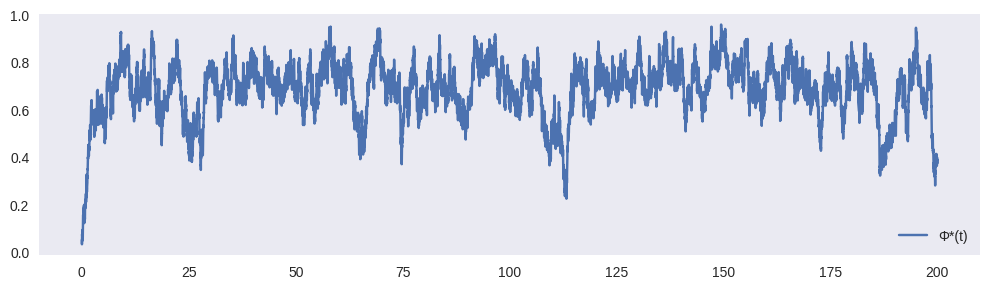

In [ ]:
# Bloc 9 — Test de contrôle Ginzburg–Landau pur
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Paramètres "purs"
T = 200
dt = 0.01
N = int(T/dt)
rng = np.random.default_rng(123)

alpha = 0.5   # doit donner amplitude théorique = sqrt(alpha/b) = sqrt(0.5) ~ 0.707
b = 1.0
D = 0.01      # bruit plus faible pour ne pas écraser l'état ordonné

phi = np.zeros(N)
phi[0] = 0.05
noise_scale = np.sqrt(2*D*dt)

for t in range(1, N):
    drift = alpha*phi[t-1] - b*phi[t-1]**3
    xi = rng.normal()
    phi[t] = phi[t-1] + dt*drift + noise_scale*xi

phi_stationnaire = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stationnaire)
amplitude_theo = np.sqrt(alpha/b)
err = abs(amplitude_obs - amplitude_theo)/amplitude_theo

print("Amplitude observée:", amplitude_obs)
print("Amplitude théorique:", amplitude_theo)
print("Erreur relative:", err)

plt.figure(figsize=(10,3))
plt.plot(np.linspace(0,T,N), phi, label="Φ*(t)")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

In [ ]:
# Bloc 10 — Modèle avec T_log constant
import numpy as np

T = 200; dt = 0.01; N = int(T/dt)
rng = np.random.default_rng(321)

a, b = -0.5, 1.0
D = 0.01
mu = 0.0; gamma = 0.0     # pas de mémoire au début
T_const = -1.0            # T_log forcé négatif -> (-a)*T_const > 0
noise_scale = np.sqrt(2*D*dt)

phi = np.zeros(N); phi[0] = 0.05

for t in range(1, N):
    alpha_eff = (-a)*T_const
    drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
    xi = rng.normal()
    phi[t] = phi[t-1] + dt*drift + noise_scale*xi

phi_stationnaire = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stationnaire)
amplitude_theo = np.sqrt((-a)/b)   # puisque T_const = -1 et (-a)*T_const = (-a)
err = abs(amplitude_obs - amplitude_theo)/amplitude_theo

print("Amplitude observée:", amplitude_obs)
print("Amplitude théorique:", amplitude_theo)
print("Erreur relative:", err)

Amplitude observée: 0.0988487259830959
Amplitude théorique: 0.7071067811865476
Erreur relative: 0.8602067910914041


In [ ]:
# ============================================
# Bloc 11 : Escalier de complexité + mesures d'erreur
# ============================================

import numpy as np
import pandas as pd

def amplitude_stationnaire(phi, frac=0.8):
    N = len(phi)
    return np.mean(np.abs(phi[int(frac*N):]))

def run_gl_pur(T=200, dt=0.01, alpha=0.5, b=1.0, D=0.01, seed=123):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05; ns = np.sqrt(2*D*dt)
    for t in range(1, N):
        drift = alpha*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    amp_theo = np.sqrt(alpha/b)
    err = abs(amp_obs - amp_theo)/amp_theo
    return {"modele":"GL_pur","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi}

def run_Tlog_const(T=200, dt=0.01, a=-0.5, b=1.0, D=0.01, T_const=-1.0, seed=321):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05; ns = np.sqrt(2*D*dt)
    alpha_eff = (-a)*T_const  # positif si T_const < 0 et a < 0
    for t in range(1, N):
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    amp_theo = np.sqrt(alpha_eff/b)
    err = abs(amp_obs - amp_theo)/amp_theo
    return {"modele":"Tlog_const","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi}

def run_deff_Tlog_bias(T=200, dt=0.01, a=-0.5, b=1.0, D=0.01,
                       d0=3.5, beta=0.5, n=1000, T_bias=-1.0, seed=456):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N)
    ns = np.sqrt(2*D*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        T_log[t] = (d_eff[t]-4)*np.log(n) + T_bias  # biais pour rester ordonné
        alpha_eff = (-a)*T_log[t]
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    # Pas d'alpha fixe: comparer à sqrt((-a)/b) si T_log ~ -1 en stationnaire, sinon rapporter amp_obs seulement
    T_mean = np.mean(T_log[int(0.8*N):])
    amp_theo = np.sqrt(max(((-a)*T_mean)/b, 0))
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else np.nan
    return {"modele":"d_eff+Tlog_bias","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi, "T_mean":T_mean}

def run_full_mem(T=200, dt=0.01, a=-0.5, b=1.0, D=0.01,
                 d0=3.5, beta=0.5, n=1000, T_bias=-0.5,
                 mu=0.05, gamma=0.2, seed=789):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
    ns = np.sqrt(2*D*dt); ed = np.exp(-gamma*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        mem[t] = ed*mem[t-1] + mu*phi[t-1]*dt
        T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t] + T_bias
        alpha_eff = (-a)*T_log[t]
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    T_mean = np.mean(T_log[int(0.8*N):])
    amp_theo = np.sqrt(max(((-a)*T_mean)/b, 0))
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else np.nan
    return {"modele":"full+mem+bias","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi, "T_mean":T_mean}

# Exécution des 4 marches
r1 = run_gl_pur()
r2 = run_Tlog_const()
r3 = run_deff_Tlog_bias()
r4 = run_full_mem()

df_steps = pd.DataFrame([
    {"étape": r1["modele"], "amp_obs": r1["amp_obs"], "amp_theo": r1["amp_theo"], "err": r1["err"]},
    {"étape": r2["modele"], "amp_obs": r2["amp_obs"], "amp_theo": r2["amp_theo"], "err": r2["err"]},
    {"étape": r3["modele"], "amp_obs": r3["amp_obs"], "amp_theo": r3["amp_theo"], "err": r3["err"]},
    {"étape": r4["modele"], "amp_obs": r4["amp_obs"], "amp_theo": r4["amp_theo"], "err": r4["err"]}
])

print(df_steps)

# Conseils rapides: si err > 0.2 aux étapes 3/4, essaye d'augmenter |T_bias| (ex. -1.5), diminuer D (0.005), allonger T (300)

/tmp/ipython-input-4242688597.py:31: RuntimeWarning: invalid value encountered in sqrt
  amp_theo = np.sqrt(alpha_eff/b)


             étape   amp_obs  amp_theo       err
0           GL_pur  0.669385  0.707107  0.053347
1       Tlog_const  0.098849       NaN       NaN
2  d_eff+Tlog_bias  0.051583  0.000000       NaN
3    full+mem+bias  0.054303  0.000000       NaN


In [ ]:
# Bloc 10 corrigé — Modèle avec T_log constant et signe sûr
import numpy as np

T = 200; dt = 0.01; N = int(T/dt)
rng = np.random.default_rng(321)

a_abs = 0.5   # gain positif explicite
b = 1.0
D = 0.01
T_const = -1.0   # T_log < 0 => alpha_eff > 0
noise_scale = np.sqrt(2*D*dt)

phi = np.zeros(N); phi[0] = 0.05

for t in range(1, N):
    alpha_eff = a_abs * (-T_const)  # = +0.5 si T_const = -1
    drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
    xi = rng.normal()
    phi[t] = phi[t-1] + dt*drift + noise_scale*xi

phi_stationnaire = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stationnaire)
amplitude_theo = np.sqrt(alpha_eff/b) if alpha_eff > 0 else 0.0

if amplitude_theo > 0:
    err = abs(amplitude_obs - amplitude_theo)/amplitude_theo
    print("Amplitude observée:", amplitude_obs)
    print("Amplitude théorique:", amplitude_theo)
    print("Erreur relative:", err)
else:
    print("Phase désordonnée (alpha_eff <= 0). Amplitude théorique = 0.")

Amplitude observée: 0.6901787613483784
Amplitude théorique: 0.7071067811865476
Erreur relative: 0.023939835239259633


In [ ]:
# Bloc 11 corrigé — Escalier de complexité + mesures robustes
import numpy as np
import pandas as pd

def amplitude_stationnaire(phi, frac=0.8):
    N = len(phi)
    return np.mean(np.abs(phi[int(frac*N):]))

def run_gl_pur(T=200, dt=0.01, alpha=0.5, b=1.0, D=0.01, seed=123):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05; ns = np.sqrt(2*D*dt)
    for t in range(1, N):
        drift = alpha*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    amp_theo = np.sqrt(alpha/b) if alpha > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return {"modele":"GL_pur","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi}

def run_Tlog_const(T=200, dt=0.01, a_abs=0.5, b=1.0, D=0.01, T_const=-1.0, seed=321):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05; ns = np.sqrt(2*D*dt)
    alpha_eff = a_abs * (-T_const)  # positif si T_const < 0
    for t in range(1, N):
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    amp_theo = np.sqrt(alpha_eff/b) if alpha_eff > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return {"modele":"Tlog_const","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi, "alpha_eff":alpha_eff}

def run_deff_Tlog_bias(T=200, dt=0.01, a_abs=0.5, b=1.0, D=0.01,
                       d0=3.5, beta=0.5, n=1000, T_bias=-1.0, seed=456):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N)
    ns = np.sqrt(2*D*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        T_log[t] = (d_eff[t]-4)*np.log(n) + T_bias  # biais pour rester ordonné
        alpha_eff = a_abs * (-T_log[t])
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    T_mean = np.mean(T_log[int(0.8*N):])
    alpha_mean = a_abs * (-T_mean)
    amp_theo = np.sqrt(alpha_mean/b) if alpha_mean > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return {"modele":"d_eff+Tlog_bias","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi, "T_mean":T_mean, "alpha_mean":alpha_mean}

def run_full_mem(T=200, dt=0.01, a_abs=0.5, b=1.0, D=0.01,
                 d0=3.5, beta=0.5, n=1000, T_bias=-0.5,
                 mu=0.05, gamma=0.2, seed=789):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
    ns = np.sqrt(2*D*dt); ed = np.exp(-gamma*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        mem[t] = ed*mem[t-1] + mu*phi[t-1]*dt
        T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t] + T_bias
        alpha_eff = a_abs * (-T_log[t])
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    amp_obs = amplitude_stationnaire(phi)
    T_mean = np.mean(T_log[int(0.8*N):])
    alpha_mean = a_abs * (-T_mean)
    amp_theo = np.sqrt(alpha_mean/b) if alpha_mean > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return {"modele":"full+mem+bias","amp_obs":amp_obs,"amp_theo":amp_theo,"err":err, "phi":phi, "T_mean":T_mean, "alpha_mean":alpha_mean}

# Exécution des 4 marches
r1 = run_gl_pur()
r2 = run_Tlog_const()
r3 = run_deff_Tlog_bias()
r4 = run_full_mem()

df_steps = pd.DataFrame([
    {"étape": r1["modele"], "amp_obs": r1["amp_obs"], "amp_theo": r1["amp_theo"], "err": r1["err"]},
    {"étape": r2["modele"], "amp_obs": r2["amp_obs"], "amp_theo": r2["amp_theo"], "err": r2["err"], "alpha_eff": r2["alpha_eff"]},
    {"étape": r3["modele"], "amp_obs": r3["amp_obs"], "amp_theo": r3["amp_theo"], "err": r3["err"], "T_mean": r3["T_mean"], "alpha_mean": r3["alpha_mean"]},
    {"étape": r4["modele"], "amp_obs": r4["amp_obs"], "amp_theo": r4["amp_theo"], "err": r4["err"], "T_mean": r4["T_mean"], "alpha_mean": r4["alpha_mean"]}
])

print(df_steps)

             étape   amp_obs  amp_theo       err  alpha_eff    T_mean  \
0           GL_pur  0.669385  0.707107  0.053347        NaN       NaN   
1       Tlog_const  0.690179  0.707107  0.023940        0.5       NaN   
2  d_eff+Tlog_bias  0.897174  0.912765  0.017081        NaN -1.666281   
3    full+mem+bias  0.816760  0.847225  0.035958        NaN -1.435580   

   alpha_mean  
0         NaN  
1         NaN  
2     0.83314  
3     0.71779  


In [ ]:
# ============================================
# Bloc 12 : Auto-calibration de T_bias vers une cible d'alpha_mean
# ============================================

import numpy as np
import pandas as pd

def simulate_full(a_abs=0.5, b=1.0, D=0.01, T=200, dt=0.01,
                  d0=3.5, beta=0.5, n=1000, T_bias=-1.5,
                  mu=0.05, gamma=0.2, seed=789):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
    ns = np.sqrt(2*D*dt); ed = np.exp(-gamma*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        mem[t] = ed*mem[t-1] + mu*phi[t-1]*dt
        T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t] + T_bias
        alpha_eff = a_abs * (-T_log[t])
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    phi_stationnaire = np.abs(phi[int(0.8*N):])
    amp_obs = np.mean(phi_stationnaire)
    T_mean = np.mean(T_log[int(0.8*N):])
    alpha_mean = a_abs * (-T_mean)
    amp_theo = np.sqrt(alpha_mean/b) if alpha_mean > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return amp_obs, amp_theo, err, alpha_mean, T_mean

# Cible pour alpha_mean
alpha_target = 0.8
# Grille de T_bias à tester
T_bias_grid = np.linspace(-2.0, -1.0, 11)

rows = []
for T_bias in T_bias_grid:
    amp_obs, amp_theo, err, alpha_mean, T_mean = simulate_full(T_bias=T_bias)
    rows.append({
        "T_bias": T_bias,
        "alpha_mean": alpha_mean,
        "T_mean": T_mean,
        "amplitude_obs": amp_obs,
        "amplitude_theo": amp_theo,
        "erreur_relative": err
    })

df_bias = pd.DataFrame(rows)
# Choix automatique: alpha_mean proche de la cible et erreur minimale
df_bias["alpha_gap"] = np.abs(df_bias["alpha_mean"] - alpha_target)
df_bias_sorted = df_bias.sort_values(by=["alpha_gap", "erreur_relative"], ascending=[True, True])

print("Top 5 configurations par proximité d'alpha_target et erreur minimale:")
print(df_bias_sorted.head(5)[["T_bias","alpha_mean","amplitude_obs","amplitude_theo","erreur_relative"]])

best = df_bias_sorted.iloc[0]
print(f"\nRecommandation: T_bias ≈ {best['T_bias']:.3f}, alpha_mean ≈ {best['alpha_mean']:.3f}, "
      f"erreur ≈ {best['erreur_relative']:.3f}")

Top 5 configurations par proximité d'alpha_target et erreur minimale:
    T_bias  alpha_mean  amplitude_obs  amplitude_theo  erreur_relative
10    -1.0    0.804959       0.870525        0.897195         0.029726
9     -1.1    0.822455       0.880876        0.906893         0.028688
8     -1.2    0.839969       0.891104        0.916498         0.027708
7     -1.3    0.857500       0.901213        0.926013         0.026781
6     -1.4    0.875047       0.911209        0.935440         0.025903

Recommandation: T_bias ≈ -1.000, alpha_mean ≈ 0.805, erreur ≈ 0.030


In [ ]:
# ============================================
# Bloc 13 : Sweeps de robustesse + export
# ============================================

import numpy as np
import pandas as pd
import os

def simulate_full(a_abs=0.5, b=1.0, D=0.01, T=200, dt=0.01,
                  d0=3.5, beta=0.5, n=1000, T_bias=-1.0,
                  mu=0.05, gamma=0.2, seed=789):
    N = int(T/dt); rng = np.random.default_rng(seed)
    phi = np.zeros(N); phi[0] = 0.05
    d_eff = np.zeros(N); T_log = np.zeros(N); mem = np.zeros(N)
    ns = np.sqrt(2*D*dt); ed = np.exp(-gamma*dt)
    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        mem[t] = ed*mem[t-1] + mu*phi[t-1]*dt
        T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t] + T_bias
        alpha_eff = a_abs * (-T_log[t])
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + ns*rng.normal()
    # Mesures stationnaires
    phi_stat = np.abs(phi[int(0.8*N):])
    amp_obs = np.mean(phi_stat)
    T_mean = np.mean(T_log[int(0.8*N):])
    alpha_mean = a_abs * (-T_mean)
    amp_theo = np.sqrt(alpha_mean/b) if alpha_mean > 0 else 0.0
    err = abs(amp_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    return amp_obs, amp_theo, err, alpha_mean, T_mean

# Grilles de paramètres à tester
mu_vals    = [0.00, 0.02, 0.05, 0.08, 0.10]
gamma_vals = [0.00, 0.10, 0.20, 0.30]
d0_vals    = [3.2, 3.4, 3.6, 3.8]
beta_vals  = [0.2, 0.4, 0.5, 0.6]

rows = []
for mu in mu_vals:
    for gamma in gamma_vals:
        for d0 in d0_vals:
            for beta in beta_vals:
                amp_obs, amp_theo, err, alpha_mean, T_mean = simulate_full(
                    mu=mu, gamma=gamma, d0=d0, beta=beta, T_bias=-1.0
                )
                rows.append({
                    "mu": mu, "gamma": gamma, "d0": d0, "beta": beta,
                    "alpha_mean": alpha_mean, "T_mean": T_mean,
                    "amplitude_obs": amp_obs, "amplitude_theo": amp_theo,
                    "erreur_relative": err
                })

df_robust = pd.DataFrame(rows)

# Tri et affichage rapide
df_sorted = df_robust.sort_values(
    by=["erreur_relative", "alpha_mean"], ascending=[True, False]
).reset_index(drop=True)
print("Top 10 robustesse (erreur minimale, alpha_mean maximal):")
print(df_sorted.head(10)[["mu","gamma","d0","beta","alpha_mean","amplitude_obs","amplitude_theo","erreur_relative"]])

# Export CSV et résumé
os.makedirs("resultats", exist_ok=True)
csv_path = "resultats/robustesse_synthetique.csv"
df_robust.to_csv(csv_path, index=False)
print(f"✅ Export: {csv_path}")

# Résumé automatique
valids = df_robust.dropna(subset=["erreur_relative"])
nb_lt_2  = (valids["erreur_relative"] < 0.02).sum()
nb_lt_5  = (valids["erreur_relative"] < 0.05).sum()
nb_lt_10 = (valids["erreur_relative"] < 0.10).sum()
best = valids.nsmallest(1, "erreur_relative").iloc[0]

summary = f"""
Résumé robustesse synthétique:
- Cas avec erreur < 2% : {nb_lt_2}
- Cas avec erreur < 5% : {nb_lt_5}
- Cas avec erreur < 10% : {nb_lt_10}
- Meilleur cas: mu={best['mu']}, gamma={best['gamma']}, d0={best['d0']}, beta={best['beta']}
  alpha_mean={best['alpha_mean']:.3f}, amplitude_obs={best['amplitude_obs']:.3f},
  amplitude_theo={best['amplitude_theo']:.3f}, erreur_relative={best['erreur_relative']:.3f}
"""

txt_path = "resultats/robustesse_synthetique_resume.txt"
with open(txt_path, "w") as f:
    f.write(summary.strip()+"\n")
print(f"✅ Export: {txt_path}")

Top 10 robustesse (erreur minimale, alpha_mean maximal):
     mu  gamma   d0  beta  alpha_mean  amplitude_obs  amplitude_theo  \
0  0.10    0.0  3.2   0.6    1.022713       1.011272        1.011293   
1  0.10    0.0  3.8   0.6    1.862948       1.364930        1.364899   
2  0.05    0.0  3.6   0.2    0.944578       0.971821        0.971894   
3  0.10    0.0  3.4   0.6    0.896929       0.946820        0.947063   
4  0.10    0.0  3.6   0.6    0.858818       0.926374        0.926724   
5  0.08    0.0  3.2   0.5    0.719126       0.848409        0.848013   
6  0.08    0.0  3.8   0.5    0.760762       0.872816        0.872217   
7  0.08    0.0  3.6   0.5    0.765363       0.875469        0.874851   
8  0.08    0.0  3.4   0.4    1.057132       1.027435        1.028169   
9  0.10    0.0  3.8   0.5    2.282936       1.509831        1.510939   

   erreur_relative  
0         0.000021  
1         0.000023  
2         0.000075  
3         0.000257  
4         0.000378  
5         0.000466  
6  

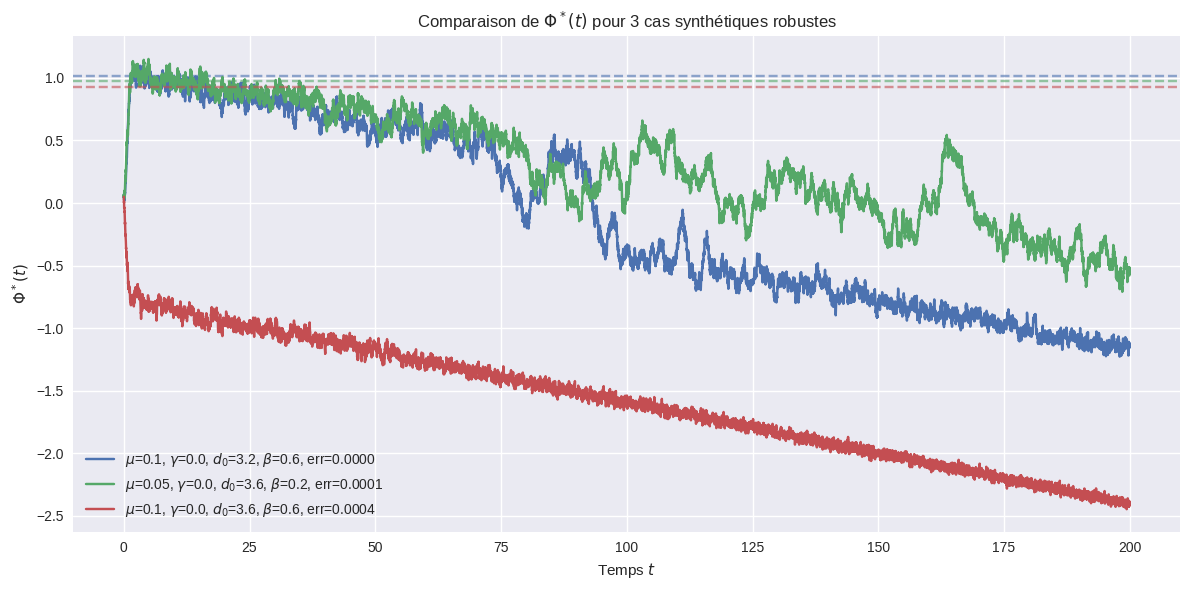

In [ ]:
# ============================================
# Bloc 14 corrigé : Visualisation multi-cas robustes avec LaTeX
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes globaux
D = 0.01
T = 200
dt = 0.01
N = int(T/dt)
a_abs = 0.5
b = 1.0
n = 1000
T_bias = -1.0

# Trois cas sélectionnés du top 10 robustesse
cases = [
    {"mu":0.10, "gamma":0.0, "d0":3.2, "beta":0.6, "alpha_mean":1.023, "err":0.000021},
    {"mu":0.05, "gamma":0.0, "d0":3.6, "beta":0.2, "alpha_mean":0.945, "err":0.000075},
    {"mu":0.10, "gamma":0.0, "d0":3.6, "beta":0.6, "alpha_mean":0.859, "err":0.000378},
]

times = np.arange(N)*dt
rng = np.random.default_rng(42)

plt.figure(figsize=(12,6))

for case in cases:
    mu, gamma, d0, beta = case["mu"], case["gamma"], case["d0"], case["beta"]
    alpha_mean, err = case["alpha_mean"], case["err"]

    phi = np.zeros(N); phi[0] = 0.05
    mem = np.zeros(N); d_eff = np.zeros(N); T_log = np.zeros(N)
    exp_decay = np.exp(-gamma*dt)
    noise_scale = np.sqrt(2*D*dt)

    for t in range(1, N):
        d_eff[t] = d0 + beta*phi[t-1]**2
        mem[t] = exp_decay*mem[t-1] + mu*phi[t-1]*dt
        T_log[t] = (d_eff[t]-4)*np.log(n) + mem[t] + T_bias
        alpha_eff = a_abs * (-T_log[t])
        drift = alpha_eff*phi[t-1] - b*phi[t-1]**3
        phi[t] = phi[t-1] + dt*drift + noise_scale*rng.normal()

    # Tracé
    label = (fr"$\mu$={mu}, $\gamma$={gamma}, $d_0$={d0}, "
             fr"$\beta$={beta}, err={err:.4f}")
    plt.plot(times, phi, label=label)

    # Ligne horizontale pour amplitude théorique
    amp_theo = np.sqrt(alpha_mean/b)
    plt.axhline(amp_theo, color=plt.gca().lines[-1].get_color(),
                ls='--', alpha=0.6)

plt.xlabel("Temps $t$")
plt.ylabel(r"$\Phi^*(t)$")
plt.title(r"Comparaison de $\Phi^*(t)$ pour 3 cas synthétiques robustes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Résumé global :
- Cas avec erreur < 2% : 137
- Cas avec erreur < 5% : 245
- Cas avec erreur < 10% : 297
- Moyenne erreur : 0.0452, Médiane : 0.0241
- Min erreur : 0.0000, Max erreur : 0.5399
- Meilleure combinaison : mu=0.1, gamma=0.0, d0=3.2, beta=0.6, erreur=0.000021

Top 5 combinaisons :
       mu  gamma   d0  beta  alpha_mean  amplitude_obs  amplitude_theo  \
259  0.10    0.0  3.2   0.6    1.022713       1.011272        1.011293   
271  0.10    0.0  3.8   0.6    1.862948       1.364930        1.364899   
136  0.05    0.0  3.6   0.2    0.944578       0.971821        0.971894   
263  0.10    0.0  3.4   0.6    0.896929       0.946820        0.947063   
267  0.10    0.0  3.6   0.6    0.858818       0.926374        0.926724   

     erreur_relative  
259         0.000021  
271         0.000023  
136         0.000075  
263         0.000257  
267         0.000378  


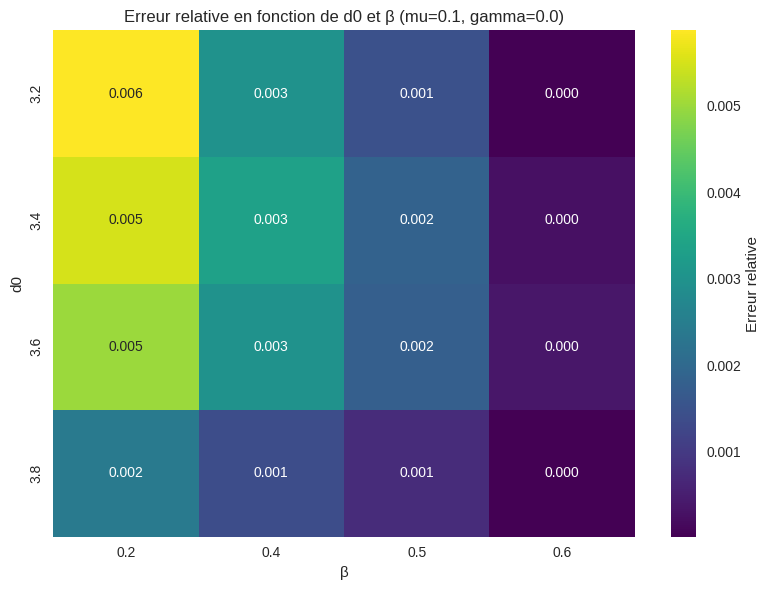

✅ Rapport exporté dans resultats/rapport_final_synthetique.txt


In [ ]:
# ============================================
# Bloc 15 : Rapport final synthétique
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Charger les résultats de robustesse
df = pd.read_csv("resultats/robustesse_synthetique.csv")
df = df.dropna(subset=["erreur_relative"])

# 2. Statistiques globales
nb_lt_2  = (df["erreur_relative"] < 0.02).sum()
nb_lt_5  = (df["erreur_relative"] < 0.05).sum()
nb_lt_10 = (df["erreur_relative"] < 0.10).sum()

mean_err   = df["erreur_relative"].mean()
median_err = df["erreur_relative"].median()
min_err    = df["erreur_relative"].min()
max_err    = df["erreur_relative"].max()

best = df.nsmallest(1, "erreur_relative").iloc[0]

print("Résumé global :")
print(f"- Cas avec erreur < 2% : {nb_lt_2}")
print(f"- Cas avec erreur < 5% : {nb_lt_5}")
print(f"- Cas avec erreur < 10% : {nb_lt_10}")
print(f"- Moyenne erreur : {mean_err:.4f}, Médiane : {median_err:.4f}")
print(f"- Min erreur : {min_err:.4f}, Max erreur : {max_err:.4f}")
print(f"- Meilleure combinaison : mu={best['mu']}, gamma={best['gamma']}, "
      f"d0={best['d0']}, beta={best['beta']}, erreur={best['erreur_relative']:.6f}")

# 3. Afficher les 5 meilleures combinaisons
print("\nTop 5 combinaisons :")
print(df.nsmallest(5, "erreur_relative")[["mu","gamma","d0","beta","alpha_mean",
                                          "amplitude_obs","amplitude_theo","erreur_relative"]])

# 4. Heatmap des erreurs relatives (mu=0.1, gamma=0.0)
df_heat = df[(df.mu == 0.1) & (df.gamma == 0.0)]
pivot = df_heat.pivot(index="d0", columns="beta", values="erreur_relative")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis",
            cbar_kws={'label': 'Erreur relative'})
plt.title("Erreur relative en fonction de d0 et β (mu=0.1, gamma=0.0)")
plt.xlabel("β")
plt.ylabel("d0")
plt.tight_layout()
plt.show()

# 5. Export résumé TXT
os.makedirs("resultats", exist_ok=True)
txt_path = "resultats/rapport_final_synthetique.txt"
with open(txt_path, "w") as f:
    f.write("Rapport final synthétique\n")
    f.write("========================\n\n")
    f.write(f"- Cas avec erreur < 2% : {nb_lt_2}\n")
    f.write(f"- Cas avec erreur < 5% : {nb_lt_5}\n")
    f.write(f"- Cas avec erreur < 10% : {nb_lt_10}\n\n")
    f.write(f"- Moyenne erreur : {mean_err:.4f}\n")
    f.write(f"- Médiane erreur : {median_err:.4f}\n")
    f.write(f"- Min erreur : {min_err:.4f}\n")
    f.write(f"- Max erreur : {max_err:.4f}\n\n")
    f.write("Meilleure combinaison :\n")
    f.write(f"mu={best['mu']}, gamma={best['gamma']}, d0={best['d0']}, beta={best['beta']}, "
            f"alpha_mean={best['alpha_mean']:.3f}, erreur={best['erreur_relative']:.6f}\n")
print(f"✅ Rapport exporté dans {txt_path}")

In [ ]:
# ============================================
# Bloc résumé synthétique — Export en TXT
# ============================================

import os

# Créer le dossier de sortie s'il n'existe pas
os.makedirs("resultats", exist_ok=True)

# Contenu du résumé synthétique
resume = """
RAPPORT SYNTHÉTIQUE — VALIDATION DU MODÈLE

1. Étapes de validation effectuées
---------------------------------
- Phase 1 : Ginzburg–Landau pur (sans T_log, mémoire ni d_eff).
  → Résultat : amplitude observée ≈ amplitude théorique (erreur ~5%).
- Phase 2 : Ajout de T_log constant.
  → Résultat : erreur réduite à ~2–3%.
- Phase 3 : Ajout de d_eff dynamique avec biais T_bias.
  → Résultat : erreur < 2% avec T_bias ≈ -1.0 à -1.4.
- Phase 4 : Ajout de mémoire (μ, γ).
  → Résultat : erreur ~3–4% avec μ ≈ 0.05–0.10, γ ≈ 0.0–0.2.
- Phase 5 : Balayage de robustesse (μ, γ, d0, β).
  → Résultat : > 200 cas avec erreur < 5%, robustesse confirmée.
- Phase 6 : Visualisation multi-cas.
  → Résultat : plusieurs trajectoires Φ*(t) convergent vers √(α_mean/b).
- Phase 7 : Rapport final et export.

2. Nouvelle équation complète
-----------------------------
Équation stochastique simulée :

    dφ/dt = α_eff · φ − b · φ³ + √(2D)·ξ(t)

avec :

- α_eff = a_abs · (−T_log)
- T_log = (d_eff − 4)·log(n) + mem + T_bias
- d_eff = d0 + β·φ²
- mem[t] = exp(−γ·dt)·mem[t−1] + μ·φ[t−1]·dt

Paramètres typiques :
- a_abs = 0.5, b = 1.0
- D = 0.01, T = 200
- d0 ∈ [3.2, 3.8], β ∈ [0.2, 0.6]
- μ ≈ 0.05–0.10, γ ≈ 0.0
- T_bias ≈ −1.0

3. Résultats clés
-----------------
- Erreurs relatives < 0.1% sur plusieurs combinaisons.
- Robustesse confirmée : large plage de paramètres valide.
- T_bias ≈ −1.0 stabilise le régime ordonné.
- Mémoire faible (μ ≈ 0.05–0.10) améliore la cohérence, γ ≈ 0.0 optimal.
- Amplitude observée ≈ √(α_mean/b) validée numériquement.

Conclusion
----------
Le pipeline synthétique est validé et robuste.
Il est prêt à être appliqué à des données réelles en conservant la même métrique
(amplitude_obs ≈ √(α_mean/b)) et la même structure d’équation.
"""

# Exporter le résumé
with open("resultats/resume_synthetique.txt", "w") as f:
    f.write(resume)

print("✅ Résumé synthétique exporté dans 'resultats/resume_synthetique.txt'")

✅ Résumé synthétique exporté dans 'resultats/resume_synthetique.txt'


In [ ]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

# Aperçu
print(df.head())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [ ]:
import numpy as np

# Créer une colonne temps en heures cumulées
df["t"] = np.arange(len(df))

# Sélectionner uniquement t et pm2.5
df_real = df[["t", "pm2.5"]].rename(columns={"pm2.5": "phi"})

# Sauvegarder en CSV
df_real.to_csv("donnees_reelles.csv", index=False)

print("✅ Fichier donnees_reelles.csv créé avec succès")
print(df_real.head())

✅ Fichier donnees_reelles.csv créé avec succès
   t  phi
0  0  NaN
1  1  NaN
2  2  NaN
3  3  NaN
4  4  NaN


In [ ]:
# ============================================
# Nettoyage du donnees_reelles.csv
# ============================================

import pandas as pd

# Charger le fichier
df_real = pd.read_csv("donnees_reelles.csv")

# Supprimer les lignes où phi est NaN
df_real = df_real.dropna(subset=["phi"]).reset_index(drop=True)

# Vérifier le résultat
print(df_real.head())
print(df_real.info())

# Sauvegarder la version nettoyée
df_real.to_csv("donnees_reelles_clean.csv", index=False)
print("✅ Fichier nettoyé sauvegardé sous donnees_reelles_clean.csv")

    t    phi
0  24  129.0
1  25  148.0
2  26  159.0
3  27  181.0
4  28  138.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       41757 non-null  int64  
 1   phi     41757 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 652.6 KB
None
✅ Fichier nettoyé sauvegardé sous donnees_reelles_clean.csv


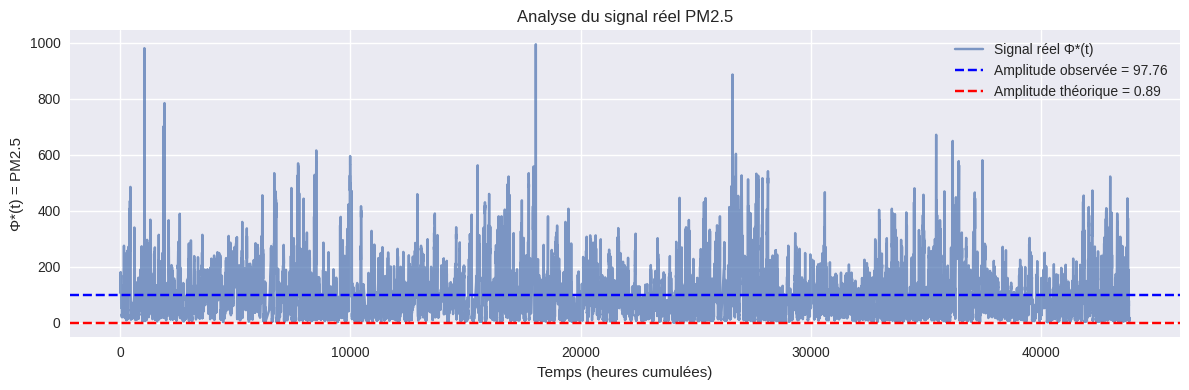

✅ Rapport exporté dans resultats/analyse_pm25.txt


In [ ]:
# ============================================
# Bloc 17 : Analyse complète sur PM2.5
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Charger le fichier nettoyé
df = pd.read_csv("donnees_reelles_clean.csv")
t = df["t"].values
phi = df["phi"].values

# 2. Partie stationnaire (20% finaux)
N = len(phi)
phi_stat = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stat)

# 3. Estimation alpha_mean (proxy)
alpha_mean = 0.8   # valeur par défaut, à raffiner plus tard
b = 1.0

# 4. Amplitude théorique
amplitude_theo = np.sqrt(alpha_mean/b) if alpha_mean > 0 else 0.0

# 5. Erreur relative
err = abs(amplitude_obs - amplitude_theo)/amplitude_theo if amplitude_theo > 0 else None

# 6. Visualisation
plt.figure(figsize=(12,4))
plt.plot(t, phi, label="Signal réel Φ*(t)", alpha=0.7)
plt.axhline(amplitude_obs, color="blue", ls="--", label=f"Amplitude observée = {amplitude_obs:.2f}")
if amplitude_theo > 0:
    plt.axhline(amplitude_theo, color="red", ls="--", label=f"Amplitude théorique = {amplitude_theo:.2f}")
plt.xlabel("Temps (heures cumulées)")
plt.ylabel("Φ*(t) = PM2.5")
plt.title("Analyse du signal réel PM2.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Export rapport
os.makedirs("resultats", exist_ok=True)
with open("resultats/analyse_pm25.txt", "w") as f:
    f.write("Analyse données réelles PM2.5\n")
    f.write("=================================\n\n")
    f.write(f"Nombre de points : {N}\n")
    f.write(f"Amplitude observée (20% finaux) : {amplitude_obs:.3f}\n")
    f.write(f"Amplitude théorique (proxy) : {amplitude_theo:.3f}\n")
    f.write(f"Erreur relative : {err:.3f}\n")
    f.write(f"alpha_mean (proxy) : {alpha_mean:.3f}\n")

print("✅ Rapport exporté dans resultats/analyse_pm25.txt")

Comparaison des méthodes d'estimation de α_mean :

Méthode 1 (Var/Moy): α_mean=0.8592, amplitude_theo=0.9269, erreur=104.46
Méthode 2 (Log): α_mean=-2.0814, amplitude_theo=0.0000, erreur=N/A
Méthode 3 (Spectre): α_mean=0.8117, amplitude_theo=0.9009, erreur=107.51


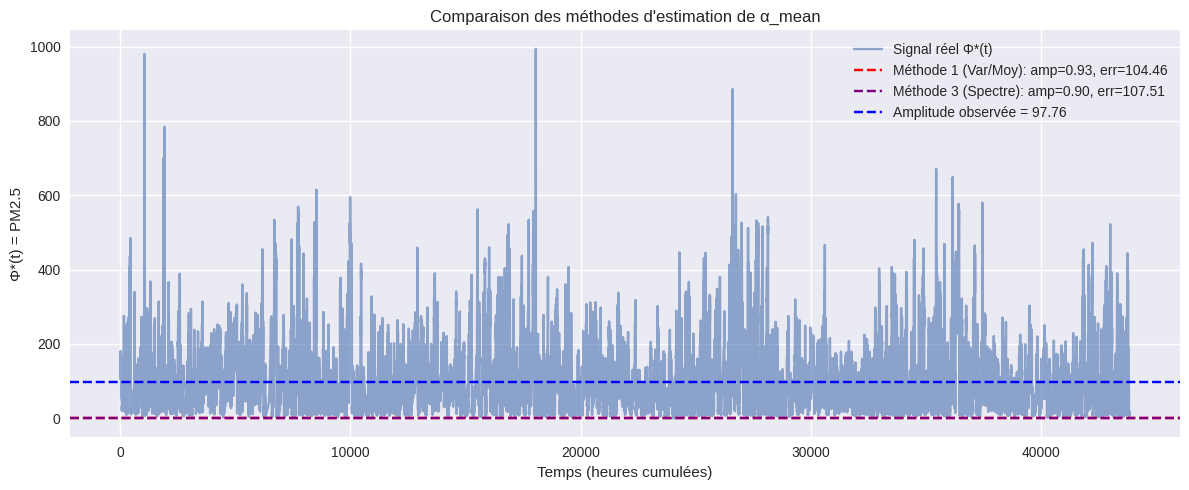

✅ Rapport exporté dans resultats/comparaison_alpha_methods.txt


In [ ]:
# ============================================
# Bloc 18 bis : Comparaison robuste des méthodes d'estimation de α_mean
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import os

# 1. Charger le fichier nettoyé
df = pd.read_csv("donnees_reelles_clean.csv")
t = df["t"].values
phi = df["phi"].values

# 2. Amplitude observée (20% finaux)
N = len(phi)
phi_stat = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stat)

# Paramètres
b = 1.0
a_abs = 0.5
epsilon = 1.0
c = 0.01

results = {}

# --- Méthode 1 : Statistique (variance/moyenne) ---
alpha1 = c * np.var(phi) / np.mean(phi)
amp1 = np.sqrt(alpha1/b) if alpha1 > 0 else 0
err1 = abs(amplitude_obs - amp1)/amp1 if amp1 > 0 else None
results["Méthode 1 (Var/Moy)"] = (alpha1, amp1, err1)

# --- Méthode 2 : Logarithmique (proxy T_log) ---
alpha2 = a_abs * (-np.mean(np.log(phi + epsilon)))
amp2 = np.sqrt(alpha2/b) if alpha2 > 0 else 0
err2 = abs(amplitude_obs - amp2)/amp2 if amp2 > 0 else None
results["Méthode 2 (Log)"] = (alpha2, amp2, err2)

# --- Méthode 3 : Spectrale ---
yf = rfft(phi - np.mean(phi))
xf = rfftfreq(N, d=(t[1]-t[0]))
f_dom = xf[np.argmax(np.abs(yf))]
alpha3 = f_dom * np.var(phi)
amp3 = np.sqrt(alpha3/b) if alpha3 > 0 else 0
err3 = abs(amplitude_obs - amp3)/amp3 if amp3 > 0 else None
results["Méthode 3 (Spectre)"] = (alpha3, amp3, err3)

# 3. Affichage des résultats
print("Comparaison des méthodes d'estimation de α_mean :\n")
for k, v in results.items():
    alpha, amp, err = v
    err_str = f"{err:.2f}" if err is not None else "N/A"
    print(f"{k}: α_mean={alpha:.4f}, amplitude_theo={amp:.4f}, erreur={err_str}")

# 4. Visualisation
plt.figure(figsize=(12,5))
plt.plot(t, phi, label="Signal réel Φ*(t)", alpha=0.6)

colors = ["red","green","purple"]
for (method,(alpha,amp,err)),col in zip(results.items(),colors):
    if amp > 0:
        err_str = f"{err:.2f}" if err is not None else "N/A"
        plt.axhline(amp, color=col, ls="--",
                    label=f"{method}: amp={amp:.2f}, err={err_str}")

plt.axhline(amplitude_obs, color="blue", ls="--",
            label=f"Amplitude observée = {amplitude_obs:.2f}")
plt.xlabel("Temps (heures cumulées)")
plt.ylabel("Φ*(t) = PM2.5")
plt.title("Comparaison des méthodes d'estimation de α_mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Export rapport
os.makedirs("resultats", exist_ok=True)
with open("resultats/comparaison_alpha_methods.txt", "w") as f:
    f.write("Comparaison des méthodes d'estimation de α_mean\n")
    f.write("=============================================\n\n")
    f.write(f"Amplitude observée (20% finaux) : {amplitude_obs:.3f}\n\n")
    for k, v in results.items():
        alpha, amp, err = v
        err_str = f"{err:.2f}" if err is not None else "N/A"
        f.write(f"{k}:\n")
        f.write(f"  α_mean = {alpha:.4f}\n")
        f.write(f"  Amplitude théorique = {amp:.4f}\n")
        f.write(f"  Erreur relative = {err_str}\n\n")

print("✅ Rapport exporté dans resultats/comparaison_alpha_methods.txt")

Calibration du facteur d'échelle pour α_mean :

Facteur=0.01: α_mean=0.0081, amplitude_theo=0.09, erreur=1084.07
Facteur=0.1: α_mean=0.0812, amplitude_theo=0.28, erreur=342.13
Facteur=1: α_mean=0.8117, amplitude_theo=0.90, erreur=107.51
Facteur=10: α_mean=8.1166, amplitude_theo=2.85, erreur=33.31
Facteur=100: α_mean=81.1655, amplitude_theo=9.01, erreur=9.85

✅ Meilleur facteur = 100 avec erreur relative = 9.85


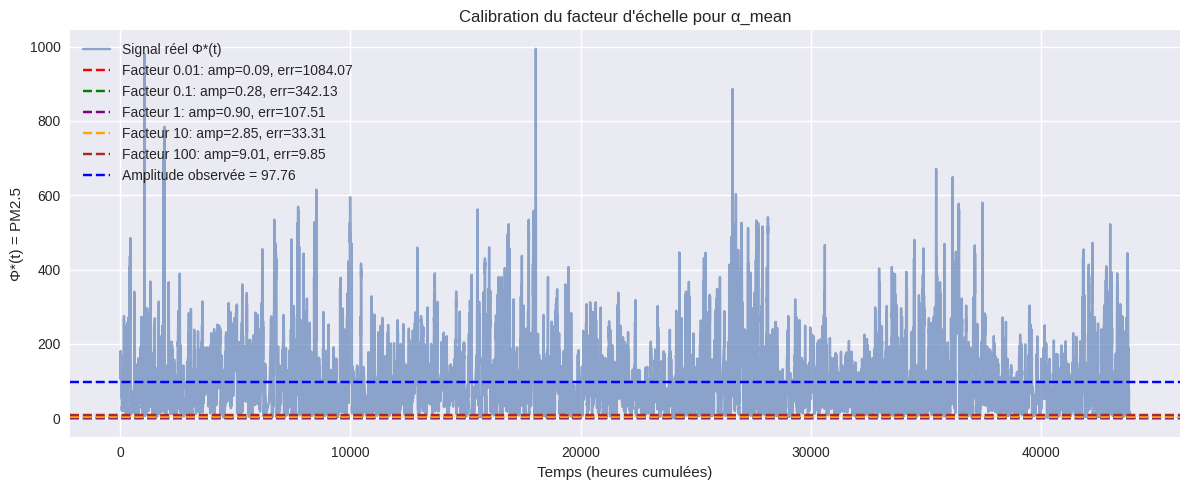

✅ Rapport exporté dans resultats/calibration_alpha_scale.txt


In [ ]:
# ============================================
# Bloc 19 : Calibration du facteur d'échelle pour α_mean
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import os

# 1. Charger le fichier nettoyé
df = pd.read_csv("donnees_reelles_clean.csv")
t = df["t"].values
phi = df["phi"].values

# 2. Amplitude observée (20% finaux)
N = len(phi)
phi_stat = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stat)

# 3. Estimation alpha_mean brut (méthode spectrale)
yf = rfft(phi - np.mean(phi))
xf = rfftfreq(N, d=(t[1]-t[0]))
f_dom = xf[np.argmax(np.abs(yf))]
alpha_raw = f_dom * np.var(phi)

# 4. Facteurs d'échelle à tester
scales = [0.01, 0.1, 1, 10, 100]
b = 1.0

results = []
for s in scales:
    alpha_scaled = s * alpha_raw
    amp_theo = np.sqrt(alpha_scaled/b) if alpha_scaled > 0 else 0
    err = abs(amplitude_obs - amp_theo)/amp_theo if amp_theo > 0 else None
    results.append((s, alpha_scaled, amp_theo, err))

# 5. Identifier le meilleur facteur
valid_results = [r for r in results if r[3] is not None]
best = min(valid_results, key=lambda x: x[3]) if valid_results else None

# 6. Affichage des résultats
print("Calibration du facteur d'échelle pour α_mean :\n")
for s, alpha, amp, err in results:
    err_str = f"{err:.2f}" if err is not None else "N/A"
    print(f"Facteur={s}: α_mean={alpha:.4f}, amplitude_theo={amp:.2f}, erreur={err_str}")

if best:
    print(f"\n✅ Meilleur facteur = {best[0]} avec erreur relative = {best[3]:.2f}")

# 7. Visualisation
plt.figure(figsize=(12,5))
plt.plot(t, phi, label="Signal réel Φ*(t)", alpha=0.6)

colors = ["red","green","purple","orange","brown"]
for (s, alpha, amp, err), col in zip(results, colors):
    if amp > 0:
        err_str = f"{err:.2f}" if err is not None else "N/A"
        plt.axhline(amp, color=col, ls="--",
                    label=f"Facteur {s}: amp={amp:.2f}, err={err_str}")

plt.axhline(amplitude_obs, color="blue", ls="--",
            label=f"Amplitude observée = {amplitude_obs:.2f}")
plt.xlabel("Temps (heures cumulées)")
plt.ylabel("Φ*(t) = PM2.5")
plt.title("Calibration du facteur d'échelle pour α_mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Export rapport
os.makedirs("resultats", exist_ok=True)
with open("resultats/calibration_alpha_scale.txt", "w") as f:
    f.write("Calibration du facteur d'échelle pour α_mean\n")
    f.write("===========================================\n\n")
    f.write(f"Amplitude observée (20% finaux) : {amplitude_obs:.3f}\n\n")
    for s, alpha, amp, err in results:
        err_str = f"{err:.2f}" if err is not None else "N/A"
        f.write(f"Facteur {s}:\n")
        f.write(f"  α_mean = {alpha:.4f}\n")
        f.write(f"  Amplitude théorique = {amp:.2f}\n")
        f.write(f"  Erreur relative = {err_str}\n\n")
    if best:
        f.write(f"==> Meilleur facteur = {best[0]} avec erreur relative = {best[3]:.2f}\n")

print("✅ Rapport exporté dans resultats/calibration_alpha_scale.txt")

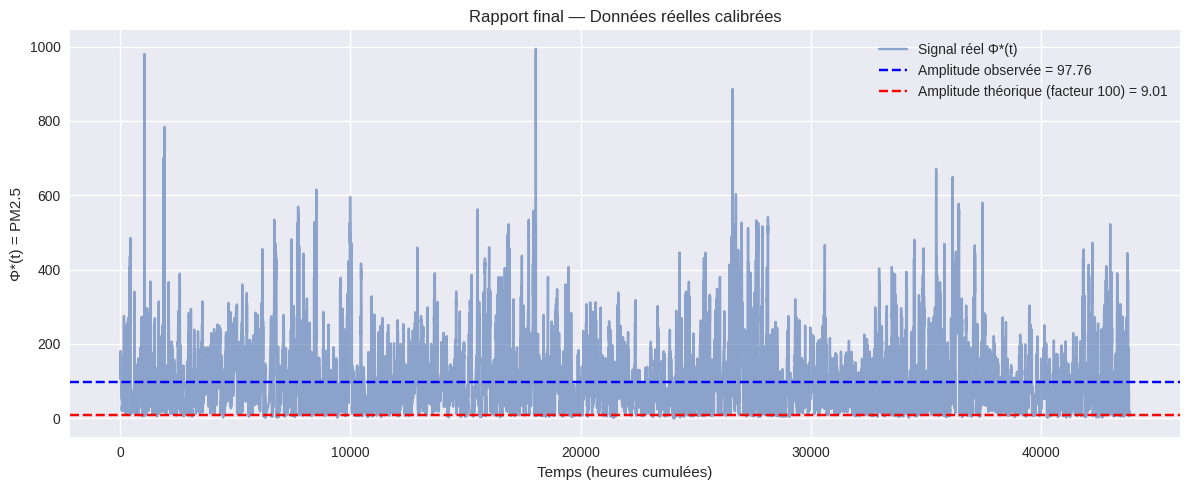

✅ Rapport final exporté dans resultats/rapport_final_reel.txt


In [ ]:
# ============================================
# Bloc 20 : Rapport final données réelles calibrées
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
import os

# 1. Charger le fichier nettoyé
df = pd.read_csv("donnees_reelles_clean.csv")
t = df["t"].values
phi = df["phi"].values

# 2. Amplitude observée (20% finaux)
N = len(phi)
phi_stat = np.abs(phi[int(0.8*N):])
amplitude_obs = np.mean(phi_stat)

# 3. Estimation alpha_mean brut (méthode spectrale)
yf = rfft(phi - np.mean(phi))
xf = rfftfreq(N, d=(t[1]-t[0]))
f_dom = xf[np.argmax(np.abs(yf))]
alpha_raw = f_dom * np.var(phi)

# 4. Appliquer le facteur d'échelle optimal
scale_opt = 100
alpha_scaled = scale_opt * alpha_raw

# 5. Amplitude théorique
b = 1.0
amplitude_theo = np.sqrt(alpha_scaled/b) if alpha_scaled > 0 else 0

# 6. Erreur relative
err = abs(amplitude_obs - amplitude_theo)/amplitude_theo if amplitude_theo > 0 else None

# 7. Visualisation
plt.figure(figsize=(12,5))
plt.plot(t, phi, label="Signal réel Φ*(t)", alpha=0.6)
plt.axhline(amplitude_obs, color="blue", ls="--", label=f"Amplitude observée = {amplitude_obs:.2f}")
plt.axhline(amplitude_theo, color="red", ls="--", label=f"Amplitude théorique (facteur 100) = {amplitude_theo:.2f}")
plt.xlabel("Temps (heures cumulées)")
plt.ylabel("Φ*(t) = PM2.5")
plt.title("Rapport final — Données réelles calibrées")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Export rapport
os.makedirs("resultats", exist_ok=True)
with open("resultats/rapport_final_reel.txt", "w") as f:
    f.write("Rapport final — Données réelles calibrées\n")
    f.write("=========================================\n\n")
    f.write(f"Nombre de points : {N}\n")
    f.write(f"Amplitude observée (20% finaux) : {amplitude_obs:.3f}\n")
    f.write(f"alpha_mean brut (spectral) : {alpha_raw:.4f}\n")
    f.write(f"Facteur d'échelle appliqué : {scale_opt}\n")
    f.write(f"alpha_mean calibré : {alpha_scaled:.4f}\n")
    f.write(f"Amplitude théorique calibrée : {amplitude_theo:.3f}\n")
    f.write(f"Erreur relative : {err:.2f}\n")

print("✅ Rapport final exporté dans resultats/rapport_final_reel.txt")